**Methods to Transform Skewed Data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [2]:
# Transforming skewed data (making it more normally distributed)
# is crucial because "many" machine learning algorithms assume that the data follows a normal distribution. 
# Skewness can lead to biased estimates and affect the performance of your models.

**Power Transformer (PowerTransformer - sklearn)**

In [3]:
# PowerTransformer 
# Automatically applies a Box-Cox (only for positive values) or Yeo-Johnson (for both positive and negative values) transformation.


In [4]:
# Generate data (highly skewed positive data (exponential distribution))
np.random.seed(42)
data_boxcox = np.random.exponential(scale=2, size=(1000, 1))  # Scale controls the spread
print(f'Shape of the skewed data: {data_boxcox.shape}')
if np.any(data_boxcox <= 0):
    raise ValueError("Box-Cox transformation requires strictly positive values.")

Shape of the skewed data: (1000, 1)


In [5]:
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
boxcox_transformed_data = boxcox_transformer.fit_transform(data_boxcox)

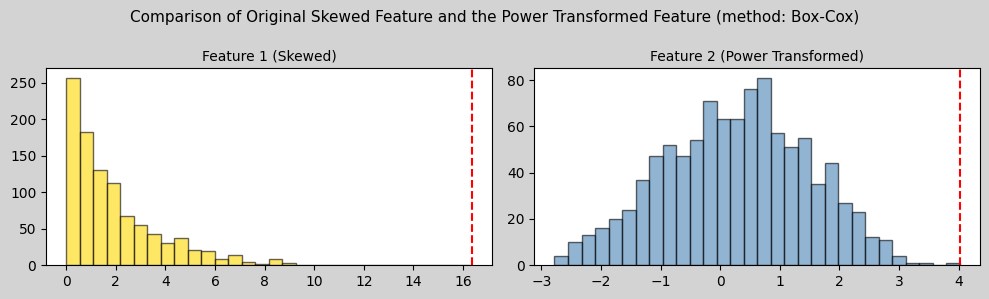

In [6]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2) #  fig, (ax1, ax2)
fig.set_figwidth(10)
fig.set_figheight(3)
fig.set_facecolor('lightgrey')
fig.suptitle('Comparison of Original Skewed Feature and the Power Transformed Feature (method: Box-Cox)', fontsize=11)

title_list = ['Feature 1 (Skewed)', 'Feature 2 (Power Transformed)']

axes[0].hist(data_boxcox, bins=30, color='gold', edgecolor='black', alpha=0.6)
axes[0].axvline(np.max(data_boxcox), color='red', linestyle='--')
axes[0].set_title(title_list[0], fontsize=10)


axes[1].hist(boxcox_transformed_data, bins=30, color='steelblue', edgecolor='black', alpha=0.6)
axes[1].axvline(np.max(boxcox_transformed_data), color='red', linestyle='--')
axes[1].set_title(title_list[1], fontsize=10)

plt.tight_layout()
plt.show()

In [7]:
# Create a skewed dataset including negative values
data_yeojohnson = np.random.chisquare(df=2, size=(1000, 1))
data_yeojohnson -= np.abs(np.min(data_yeojohnson)) + 0.1  # Ensure some negative values


In [8]:
yeojohnson_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
yeojohnson_transformed_data = yeojohnson_transformer.fit_transform(data_yeojohnson)

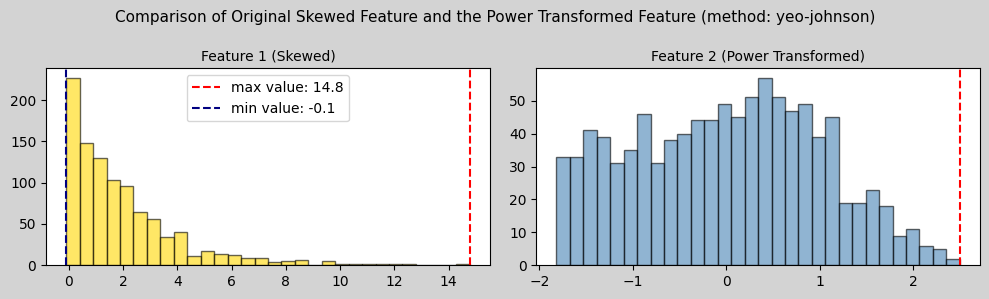

In [9]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2) #  fig, (ax1, ax2)
fig.set_figwidth(10)
fig.set_figheight(3)
fig.set_facecolor('lightgrey')
fig.suptitle('Comparison of Original Skewed Feature and the Power Transformed Feature (method: yeo-johnson)', fontsize=11)

title_list = ['Feature 1 (Skewed)', 'Feature 2 (Power Transformed)']

axes[0].hist(data_yeojohnson, bins=30, color='gold', edgecolor='black', alpha=0.6)
axes[0].axvline(np.max(data_yeojohnson), color='red', linestyle='--', label=f'max value: {np.max(data_yeojohnson):.1f}')
axes[0].axvline(np.min(data_yeojohnson), color='navy', linestyle='--', label=f'min value: {np.min(data_yeojohnson):.1f}')
axes[0].set_title(title_list[0], fontsize=10)
axes[0].legend()


axes[1].hist(yeojohnson_transformed_data, bins=30, color='steelblue', edgecolor='black', alpha=0.6)
axes[1].axvline(np.max(yeojohnson_transformed_data), color='red', linestyle='--')
axes[1].set_title(title_list[1], fontsize=10)

plt.tight_layout()
plt.show()